**Аналитическая задача** — провести анализ данных с целью выделения портретов заемщиков по каждой группе целевого признака.

**Примерный план исследования**

Шаг 1. Загрузка данных;

Шаг 2. Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

Шаг 3. Добавление новых признаков:
- для каждого клиента рассчитайте его возраст на настоящий момент времени (на 2022 год);

Шаг 4. Исследовательский анализ данных
- в разрезе значений целевого признака (`Дисциплина клиентов без просрочки по кредиту`) исследовать распределения числовых и категориальных признаков;
- в разрезе значений целевого признака составить портреты клиентов платежной системы.

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from numpy.lib.function_base import percentile

import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/dataset_segment_bank.csv')
df.head(3)

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.0,265000.0,21858.8235,371600.0,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.0,135000.0,34393.5000,137574.0,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.0,135000.0,58383.3333,175150.0,Стойка,МегаФон,М


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50224 entries, 0 to 50223
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Идентификатор                                 50224 non-null  int64  
 1   Дата рождения                                 50224 non-null  object 
 2   Дисциплина клиентов без просрочки по кредиту  50223 non-null  object 
 3   Количество переводов                          50158 non-null  float64
 4   Тип переводов                                 50191 non-null  float64
 5   География переводов                           50191 non-null  float64
 6   География телефона                            48324 non-null  float64
 7   Сумма перевода                                50158 non-null  float64
 8   Максимальная сумма перевода                   50158 non-null  float64
 9   Средняя сумма перевода                        50158 non-null 

In [ ]:
df.columns

Index(['Идентификатор', 'Дата рождения',
       'Дисциплина клиентов без просрочки по кредиту', 'Количество переводов',
       'Тип переводов', 'География переводов', 'География телефона',
       'Сумма перевода', 'Максимальная сумма перевода',
       'Средняя сумма перевода', 'Полная сумма перевода',
       'Канал, через который пришел клиент', 'Оператор связи', 'Пол'],
      dtype='object')

In [ ]:
select_columns = ['Количество переводов', 'Сумма перевода',
                  'Максимальная сумма перевода',
                  'Средняя сумма перевода', 'Полная сумма перевода']
df[select_columns].describe(percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,Количество переводов,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода
count,50158.000000,5.015800e+04,5.015800e+04,50158.000000,5.015800e+04
mean,17.290821,2.995784e+05,1.676934e+05,34478.895504,2.995784e+05
std,34.801316,4.527366e+05,1.410307e+05,43548.644155,4.527366e+05
min,1.000000,3.000000e+01,3.000000e+01,30.000000,3.000000e+01
1%,1.000000,2.380555e+04,1.041879e+04,2318.792510,2.380555e+04
5%,2.000000,4.000000e+04,3.000000e+04,4381.164050,4.000000e+04
25%,4.000000,9.225300e+04,5.500000e+04,10108.333300,9.225300e+04
50%,9.000000,1.877303e+05,1.200000e+05,19831.931800,1.877303e+05
75%,18.000000,3.831000e+05,2.350000e+05,41650.750000,3.831000e+05
90%,37.000000,6.195000e+05,4.100000e+05,77144.875000,6.195000e+05


In [74]:
cat_var = ['Дисциплина клиентов без просрочки по кредиту', 'Тип переводов',
           'География переводов', 'География телефона',
           'Канал, через который пришел клиент', 'Оператор связи', 'Пол']
for col in cat_var:
    print(f'Уникальные значения признака -- {col}. ')
    print(df[col].unique())
    print('--'*30)

Уникальные значения признака -- Дисциплина клиентов без просрочки по кредиту. 
['BAD' 'GOOD' 'MIDDLE' nan]
------------------------------------------------------------
Уникальные значения признака -- Тип переводов. 
[ 2. 69.  1.  5.  8. 32.  0. 10. 26. 12.  6. 45. 11. 33. 16.  7. 37. 21.
 58. 19. 59. 44. 53. 28. 34.  3. 43. 29. 67. 17. 30. -1. 23. 55.  4. 61.
  9. 54. nan 49.]
------------------------------------------------------------
Уникальные значения признака -- География переводов. 
[77. 71. 74. 34. 59. 23. 42. 39. 63. 16. 36. 61.  2.  7. 48. 64. 89. 56.
 62. 66. 73. 43. 33.  0. 54. 35. 13. 18. 52. 76. 55. 69. 78. 26. 30. 68.
 44. 67. 31. 21. 58. 72. 47. 53. 40. 10. 51. 37. 24. 12. 57. 86. 22. 60.
 32. 46.  5.  1. 45.  9. 14. 25.  8. 15. 11. 65. 38. 29. 75.  6. 20. 19.
 nan]
------------------------------------------------------------
Уникальные значения признака -- География телефона. 
[77. 20. 71. 74. 34. 59. 23. 42. 39. 63. 16. 36.  2. 61. 76. 48. 73. nan
 56. 62. 66. 43. 52.

In [ ]:
df['Дата рождения'] = pd.to_datetime(df['Дата рождения'], errors = 'coerce')

In [ ]:
df.duplicated().sum()
df.loc[df.drop(columns = ['Идентификатор']).duplicated()]

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
285,13429088,1984-09-12,MIDDLE,89.0,2.0,77.0,33.0,573174.03,25950.0,6440.1576,573174.03,Партнер,Вотек Мобайл,М
334,13429088,1984-09-12,MIDDLE,89.0,2.0,77.0,33.0,573174.03,25950.0,6440.1576,573174.03,Партнер,Вотек Мобайл,М
459,17591794,1974-09-28,MIDDLE,22.0,5.0,77.0,NaN,78746.00,10200.0,3579.3636,78746.00,Партнер,Мобильные ТелеСистемы,М
466,17591794,1974-09-28,MIDDLE,22.0,5.0,77.0,NaN,78746.00,10200.0,3579.3636,78746.00,Партнер,Мобильные ТелеСистемы,М
528,4872767,1968-02-18,BAD,13.0,2.0,77.0,77.0,316064.16,150000.0,24312.6276,316064.16,Стойка,NaN,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,8551974,1979-12-02,GOOD,471.0,16.0,77.0,23.0,2029892.53,30000.0,4309.7505,2029892.53,Партнер,Вымпел-Коммуникации,М
50150,8551974,1979-12-02,GOOD,471.0,16.0,77.0,23.0,2029892.53,30000.0,4309.7505,2029892.53,Партнер,Вымпел-Коммуникации,М
50151,8551974,1979-12-02,GOOD,471.0,16.0,77.0,23.0,2029892.53,30000.0,4309.7505,2029892.53,Партнер,Вымпел-Коммуникации,М
50152,8551974,1979-12-02,GOOD,471.0,16.0,77.0,23.0,2029892.53,30000.0,4309.7505,2029892.53,Партнер,Вымпел-Коммуникации,М


In [ ]:
index_del = df[df['Идентификатор'].duplicated()].index

In [ ]:
df.drop(index = index_del,
        inplace = True)

In [ ]:
df

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,371600.00,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,137574.00,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.00,135000.0,58383.3333,175150.00,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,50250.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,215920.14,Стойка,NaN,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,5593823,1962-12-08,MIDDLE,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,Партнер,МегаФон,Ж
50220,11667343,1958-10-26,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,Вымпел-Коммуникации,М
50221,5947389,1977-10-28,BAD,NaN,2.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,Мобильные ТелеСистемы,Ж
50222,8937816,1982-10-09,BAD,NaN,44.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,NaN,М


In [ ]:
25623 - 25109

514

In [ ]:
df.drop(columns='Сумма перевода',
        inplace  = True)

In [ ]:
df.head()

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,265000.0,21858.8235,371600.00,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,135000.0,34393.5000,137574.00,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,135000.0,58383.3333,175150.00,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50000.0,16750.0000,50250.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,135000.0,43184.0280,215920.14,Стойка,NaN,М


In [ ]:
df['Тип переводов'].value_counts()

 2.0     18640
 5.0     13763
 69.0     6519
 6.0      2540
 8.0      1987
 1.0      1631
 10.0     1546
 0.0       736
 12.0      468
 26.0      286
 32.0      252
 16.0      245
 37.0      220
 11.0      194
 45.0      157
 7.0       139
 44.0       62
 58.0       45
 3.0        30
 21.0       14
 28.0       14
 33.0        7
 29.0        6
 4.0         5
 23.0        5
 19.0        5
 17.0        3
 55.0        3
 54.0        3
 34.0        2
 53.0        2
 59.0        2
 61.0        2
 43.0        1
 67.0        1
 30.0        1
-1.0         1
 9.0         1
 49.0        1
Name: Тип переводов, dtype: int64

In [ ]:
df = df[~(df['География переводов'] > 200)]

In [ ]:
df = df[~(df['География телефона'] == 0)]

In [ ]:
df['Оператор связи'].value_counts()

МегаФон                                               14192
Вымпел-Коммуникации                                   13446
Мобильные ТелеСистемы                                 12231
МобильныеТелеСистемы                                   1802
Санкт-Петербург Телеком                                1142
Ростовская Сотовая Связь                               1117
Вотек Мобайл                                            917
ЕКАТЕРИНБУРГ-2000                                       601
Ростелеком                                              593
Челябинская Сотовая Связь                               534
Нижегородская сотовая связь                             454
Кемеровская Мобильная Связь                             361
Смоленская Сотовая Связь                                246
Сибирская Сотовая Связь                                 186
Персональные Системы Связи в Регионе                    167
Волгоград-GSM                                           142
Телеком Евразия                         

In [ ]:
dict_replace = {'МобильныеТелеСистемы' : 'Мобильные ТелеСистемы',
                'Ниж-ская сот.связь' : 'Нижегородская сотовая связь'
                }
df['Оператор связи'].replace(dict_replace, inplace = True)

<ipython-input-24-d7d7ef07f64b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Оператор связи'].replace(dict_replace, inplace = True)


In [ ]:
df['Оператор связи'].value_counts()

МегаФон                                               14192
Мобильные ТелеСистемы                                 14033
Вымпел-Коммуникации                                   13446
Санкт-Петербург Телеком                                1142
Ростовская Сотовая Связь                               1117
Вотек Мобайл                                            917
ЕКАТЕРИНБУРГ-2000                                       601
Ростелеком                                              593
Челябинская Сотовая Связь                               534
Нижегородская сотовая связь                             475
Кемеровская Мобильная Связь                             361
Смоленская Сотовая Связь                                246
Сибирская Сотовая Связь                                 186
Персональные Системы Связи в Регионе                    167
Волгоград-GSM                                           142
Телеком Евразия                                         111
Липецк Мобайл                           

In [ ]:
df.columns

Index(['Идентификатор', 'Дата рождения',
       'Дисциплина клиентов без просрочки по кредиту', 'Количество переводов',
       'Тип переводов', 'География переводов', 'География телефона',
       'Максимальная сумма перевода', 'Средняя сумма перевода',
       'Полная сумма перевода', 'Канал, через который пришел клиент',
       'Оператор связи', 'Пол'],
      dtype='object')

In [ ]:
df['Возраст'] = 2023 - df['Дата рождения'].dt.year

<ipython-input-27-e67000a3a9c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Возраст'] = 2023 - df['Дата рождения'].dt.year


In [ ]:
df.head(2)

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол,Возраст
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,265000.0,21858.8235,371600.0,Стойка,NaN,Ж,42
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,135000.0,34393.5000,137574.0,Стойка,NaN,М,44


In [ ]:
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

In [ ]:
cont_var = ['Количество переводов',
           'Максимальная сумма перевода',
           'Средняя сумма перевода',
           'Полная сумма перевода',
           'Возраст']

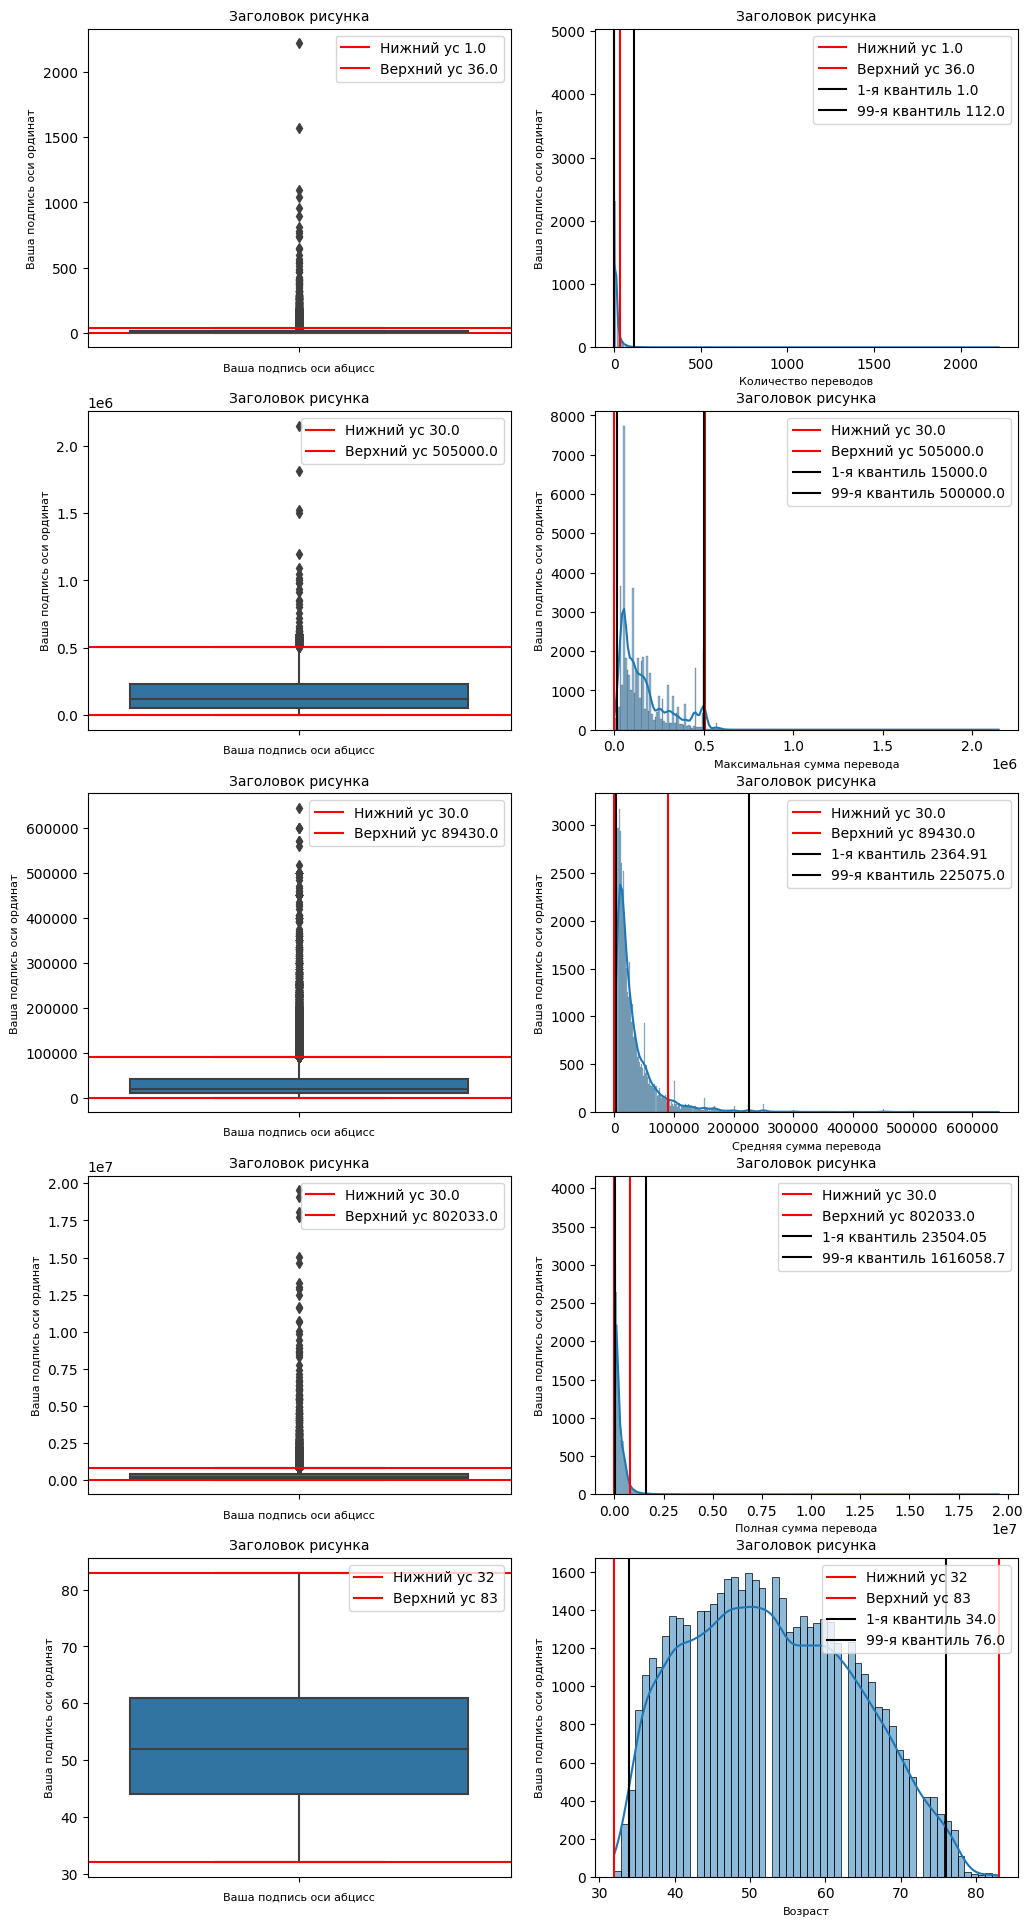

In [ ]:
fig, ax = plt.subplots(5, 2, figsize = (12, 24)) # задаем сетку 4 на 2 -- 8 графиков

for index, col in enumerate(cont_var): #перебираем в цикле заголовки признаков `col` и сразу же генерируем номер рисунка `index`
    plt.subplot(5, 2, 2*index + 1) #задаем рисунок с нужным нечетным номером (нумерация начинается с 1)
    ax = sns.boxplot(y = df[col]) #рисуем ящик
    plt.title('Заголовок рисунка', fontsize = 10) #заголовок рисунка
    plt.ylabel('Ваша подпись оси ординат', fontsize = 8) #подпись оси ординат
    plt.xlabel('Ваша подпись оси абцисс', fontsize = 8) #подпись оси абцисс
    value_low, value_upper = calc_boxplot(df[col])
    plt.axhline(value_low, #значение координаты по оси ординат -- горизонтальная линия имеет координаты (0, value_low)
                color = 'red', # цвет линии
                label = 'Нижний ус {}'.format(np.round(value_low,2)) #текст для легенды -- отображаем значение уса, округленное до 2 знаков
                )
    plt.axhline(value_upper, #значение координаты по оси ординат -- горизонтальная линия имеет координаты (0, value_upper)
                color = 'red', # цвет линии
                label = 'Верхний ус {}'.format(np.round(value_upper,2)) #текст для легенды -- отображаем значение уса, округленное до 2 знаков
                )

    plt.legend(loc='upper right') #отображаем легенду, принудительно размещая ее в правом верхнем углу

    #четные рисунки -- рисуем гистограммы и плотности
    plt.subplot(5, 2, 2*index + 2)
    ax = sns.histplot(df[col], #признак
                      kde = True #для рисования функции плотности
                      )

    #ИЗМЕНЕНИЯ ТУТ
    #вначале рисуем усы на плотности в виде вертикальных линий -- метод axvline()

    value_low, value_upper = calc_boxplot(df[col])
    plt.axvline(value_low, #значение координаты по оси ординат -- горизонтальная линия имеет координаты (0, value_low)
                color = 'red', # цвет линии
                label = 'Нижний ус {}'.format(np.round(value_low,2)) #текст для легенды -- отображаем значение уса, округленное до 2 знаков
                )
    plt.axvline(value_upper, #значение координаты по оси ординат -- горизонтальная линия имеет координаты (0, value_upper)
                color = 'red', # цвет линии
                label = 'Верхний ус {}'.format(np.round(value_upper,2)) #текст для легенды -- отображаем значение уса, округленное до 2 знаков
                )

    plt.legend(loc='upper right') #отображаем легенду, принудительно размещая ее в правом верхнем углу

    #рисуем квантили
    #вначале считаем 1 и 99 квантили
    per_1 = np.percentile(df[col].dropna(), 1)
    per_99 = np.percentile(df[col].dropna(), 99)

    plt.axvline(per_1, #значение координаты по оси ординат -- вертикальная линия имеет координаты (0, per_1)
                color = 'black', # цвет линии
                label = '1-я квантиль {}'.format(np.round(per_1,2)) #текст для легенды -- отображаем значение квантиля, округленное до 2 знаков
                )
    plt.axvline(per_99, #значение координаты по оси абцисс -- вертикальная линия имеет координаты (0, per_99)
                color = 'black', # цвет линии
                label = '99-я квантиль {}'.format(np.round(per_99,2)) #текст для легенды -- отображаем значение квантиля, округленное до 2 знаков
                )

    #для каждого признака рисуем МОДУ
    # plt.axvline(dict_value_mode[col], #значение координаты по оси ординат -- вертикальная линия имеет координаты (0, dict_value_mode[col])
    #             color = 'green', # цвет линии
    #             label = 'Мода {}'.format(np.round(dict_value_mode[col],2)) #текст для легенды -- отображаем значение моды, округленное до 2 знаков
    # )

    plt.legend(loc='upper right') #отображаем легенду, принудительно размещая ее в правом верхнем углу
    #КОНЕЦ ИЗМЕНЕНИЙ




    plt.title('Заголовок рисунка', fontsize = 10) #заголовок рисунка
    plt.ylabel('Ваша подпись оси ординат', fontsize = 8) #подпись оси ординат
    plt.xlabel(col, fontsize = 8) #подпись оси абцисс

In [ ]:
df[df['Количество переводов'] >= 112]

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол,Возраст
455,8576192,1979-07-12,BAD,139.0,2.0,77.0,77.0,250000.0,10687.0503,1485500.00,Партнер,NaN,М,44
548,4274109,1951-06-16,MIDDLE,114.0,5.0,66.0,66.0,200000.0,5783.9649,659372.00,Партнер,МегаФон,М,72
832,4534334,1958-07-26,GOOD,146.0,6.0,77.0,77.0,570000.0,9848.9078,1437940.55,Партнер,Вымпел-Коммуникации,Ж,65
857,14970042,1982-12-07,MIDDLE,202.0,0.0,77.0,NaN,45000.0,4672.7864,943902.86,Партнер,Вымпел-Коммуникации,М,41
1088,15429867,1979-03-27,MIDDLE,132.0,16.0,77.0,34.0,170000.0,2812.7082,371277.49,Офис,Вымпел-Коммуникации,Ж,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50126,8551974,1979-12-02,GOOD,471.0,16.0,77.0,23.0,30000.0,4309.7505,2029892.53,Партнер,Вымпел-Коммуникации,М,44
50154,21585124,1970-06-30,GOOD,746.0,0.0,77.0,77.0,250000.0,13454.0884,10036750.00,Офис,Вымпел-Коммуникации,М,53
50155,1778512,1968-06-10,MIDDLE,555.0,26.0,77.0,77.0,375000.0,15999.6599,8879811.26,NaN,Мобильные ТелеСистемы,NaN,55
50156,1602569,1961-05-27,MIDDLE,1094.0,16.0,77.0,77.0,140000.0,931.7830,1019370.70,Офис,МегаФон,Ж,62


In [ ]:
df[df['Максимальная сумма перевода'] >= 505000]['Дисциплина клиентов без просрочки по кредиту'].value_counts()

GOOD      261
MIDDLE     81
BAD        46
Name: Дисциплина клиентов без просрочки по кредиту, dtype: int64

In [ ]:
df['Количество переводов'] >= 112

0        False
1        False
2        False
3        False
4        False
         ...  
50219    False
50220    False
50221    False
50222    False
50223    False
Name: Количество переводов, Length: 49565, dtype: bool

In [ ]:
#Формируем три датасета
# 1. клиенты пользуются очень много
# 2. клиенты переводят очень много
# 3. остальные клиенты
df_big_use = df[df['Количество переводов'] >= 112]
df_big_mount = df[df['Максимальная сумма перевода'] >= 505000]
df_others = df[(df['Количество переводов'] < 112) &
               (df['Максимальная сумма перевода'] < 505000)]

In [ ]:
fig, ax = plt.subplots(5, 2, figsize = (12, 24)) # задаем сетку 4 на 2 -- 8 графиков

for index, col in enumerate(cont_var): #перебираем в цикле заголовки признаков `col` и сразу же генерируем номер рисунка `index`
    plt.subplot(5, 2, 2*index + 1) #задаем рисунок с нужным нечетным номером (нумерация начинается с 1)
    ax = sns.boxplot(y = df_others[col]) #рисуем ящик
    plt.title('Заголовок рисунка', fontsize = 10) #заголовок рисунка
    plt.ylabel('Ваша подпись оси ординат', fontsize = 8) #подпись оси ординат
    plt.xlabel('Ваша подпись оси абцисс', fontsize = 8) #подпись оси абцисс
    value_low, value_upper = calc_boxplot(df_others[col])
    plt.axhline(value_low, #значение координаты по оси ординат -- горизонтальная линия имеет координаты (0, value_low)
                color = 'red', # цвет линии
                label = 'Нижний ус {}'.format(np.round(value_low,2)) #текст для легенды -- отображаем значение уса, округленное до 2 знаков
                )
    plt.axhline(value_upper, #значение координаты по оси ординат -- горизонтальная линия имеет координаты (0, value_upper)
                color = 'red', # цвет линии
                label = 'Верхний ус {}'.format(np.round(value_upper,2)) #текст для легенды -- отображаем значение уса, округленное до 2 знаков
                )

    plt.legend(loc='upper right') #отображаем легенду, принудительно размещая ее в правом верхнем углу

    #четные рисунки -- рисуем гистограммы и плотности
    plt.subplot(5, 2, 2*index + 2)
    ax = sns.histplot(df_others[col], #признак
                      kde = True #для рисования функции плотности
                      )

    #ИЗМЕНЕНИЯ ТУТ
    #вначале рисуем усы на плотности в виде вертикальных линий -- метод axvline()

    value_low, value_upper = calc_boxplot(df_others[col])
    plt.axvline(value_low, #значение координаты по оси ординат -- горизонтальная линия имеет координаты (0, value_low)
                color = 'red', # цвет линии
                label = 'Нижний ус {}'.format(np.round(value_low,2)) #текст для легенды -- отображаем значение уса, округленное до 2 знаков
                )
    plt.axvline(value_upper, #значение координаты по оси ординат -- горизонтальная линия имеет координаты (0, value_upper)
                color = 'red', # цвет линии
                label = 'Верхний ус {}'.format(np.round(value_upper,2)) #текст для легенды -- отображаем значение уса, округленное до 2 знаков
                )

    plt.legend(loc='upper right') #отображаем легенду, принудительно размещая ее в правом верхнем углу

    #рисуем квантили
    #вначале считаем 1 и 99 квантили
    per_1 = np.percentile(df_others[col].dropna(), 1)
    per_99 = np.percentile(df_others[col].dropna(), 99)

    plt.axvline(per_1, #значение координаты по оси ординат -- вертикальная линия имеет координаты (0, per_1)
                color = 'black', # цвет линии
                label = '1-я квантиль {}'.format(np.round(per_1,2)) #текст для легенды -- отображаем значение квантиля, округленное до 2 знаков
                )
    plt.axvline(per_99, #значение координаты по оси абцисс -- вертикальная линия имеет координаты (0, per_99)
                color = 'black', # цвет линии
                label = '99-я квантиль {}'.format(np.round(per_99,2)) #текст для легенды -- отображаем значение квантиля, округленное до 2 знаков
                )

    #для каждого признака рисуем МОДУ
    # plt.axvline(dict_value_mode[col], #значение координаты по оси ординат -- вертикальная линия имеет координаты (0, dict_value_mode[col])
    #             color = 'green', # цвет линии
    #             label = 'Мода {}'.format(np.round(dict_value_mode[col],2)) #текст для легенды -- отображаем значение моды, округленное до 2 знаков
    # )

    plt.legend(loc='upper right') #отображаем легенду, принудительно размещая ее в правом верхнем углу
    #КОНЕЦ ИЗМЕНЕНИЙ




    plt.title('Заголовок рисунка', fontsize = 10) #заголовок рисунка
    plt.ylabel('Ваша подпись оси ординат', fontsize = 8) #подпись оси ординат
    plt.xlabel(col, fontsize = 8) #подпись оси абцисс

In [ ]:
df_big_mount.isna().sum()
df_big_use.isna().sum()
df_others.isna().sum()

In [ ]:
df_others = df_others.loc[~(df_others['Дисциплина клиентов без просрочки по кредиту'].isna())]

In [ ]:
df_big_use.groupby('Дисциплина клиентов без просрочки по кредиту')[cont_var].agg(['mean', 'median'])

In [ ]:
df_big_mount.groupby('Дисциплина клиентов без просрочки по кредиту')[cont_var].agg(['mean', 'median'])

In [ ]:
df_others.groupby('Дисциплина клиентов без просрочки по кредиту')[cont_var].agg(['mean', 'median'])

In [75]:
cat_var.remove('Дисциплина клиентов без просрочки по кредиту')

In [ ]:
df_others.groupby('Дисциплина клиентов без просрочки по кредиту')[cat_var].agg('count')

In [76]:
for col in cat_var:
    display(df_others.pivot_table(index = 'Дисциплина клиентов без просрочки по кредиту',
                columns = col,
                values = 'Идентификатор',
                aggfunc = 'count').fillna(0))

Тип переводов,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,44.0,45.0,53.0,54.0,55.0,58.0,59.0,61.0,67.0,69.0
Дисциплина клиентов без просрочки по кредиту,,,,,,,,,,,,,,,,,,,,,
BAD,0.0,121.0,673.0,3676.0,7.0,3.0,1660.0,650.0,21.0,682.0,...,17.0,94.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,985.0
GOOD,1.0,389.0,536.0,9548.0,16.0,1.0,7592.0,1191.0,91.0,771.0,...,24.0,29.0,1.0,2.0,3.0,24.0,1.0,1.0,1.0,4253.0
MIDDLE,0.0,199.0,413.0,4996.0,6.0,1.0,4332.0,658.0,23.0,518.0,...,20.0,34.0,0.0,0.0,0.0,13.0,1.0,1.0,0.0,1223.0


География переводов,0.0,1.0,2.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,86.0,89.0
Дисциплина клиентов без просрочки по кредиту,,,,,,,,,,,,,,,,,,,,,
BAD,28.0,3.0,339.0,2.0,0.0,4.0,1.0,3.0,53.0,3.0,...,157.0,20.0,99.0,310.0,1.0,39.0,3446.0,514.0,1.0,1.0
GOOD,70.0,6.0,506.0,5.0,1.0,3.0,1.0,2.0,525.0,1.0,...,297.0,113.0,273.0,413.0,1.0,115.0,10095.0,2387.0,17.0,6.0
MIDDLE,74.0,4.0,445.0,3.0,0.0,5.0,4.0,1.0,166.0,0.0,...,236.0,45.0,138.0,250.0,0.0,63.0,5125.0,1116.0,7.0,3.0


География телефона,1.0,2.0,5.0,7.0,8.0,9.0,10.0,12.0,13.0,14.0,...,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0
Дисциплина клиентов без просрочки по кредиту,,,,,,,,,,,,,,,,,,,,,
BAD,5.0,417.0,3.0,4.0,4.0,2.0,61.0,13.0,65.0,0.0,...,68.0,1.0,209.0,38.0,142.0,385.0,0.0,58.0,1951.0,716.0
GOOD,25.0,577.0,5.0,11.0,3.0,5.0,544.0,45.0,184.0,1.0,...,150.0,2.0,352.0,151.0,309.0,478.0,0.0,124.0,7381.0,3156.0
MIDDLE,10.0,506.0,9.0,4.0,3.0,5.0,171.0,24.0,99.0,0.0,...,75.0,1.0,275.0,61.0,173.0,293.0,1.0,71.0,3875.0,1446.0


"Канал, через который пришел клиент",Офис,Партнер,Стойка
Дисциплина клиентов без просрочки по кредиту,,,
BAD,3606,4609,893
GOOD,14413,9798,2064
MIDDLE,6226,5858,1128


Оператор связи,Адыгейская сотовая связь,Архангельские Мобильные Сети,Астарта,Астрахань GSM,Байкалвестком,Белгородская Сотовая Связь,Беспровод. инф. технологи,Волгоград-GSM,Вотек Мобайл,Вымпел-Коммуникации,...,Сибирская Сотовая Связь,Смоленская Сотовая Связь,Сот.св.Башкортостана,Сотовая Связь Удмуртии,Средневолжская межрегиональная ассоциация радиотел,Телеком Евразия,Телесет Лтд.,Финансовая компания ИМПЕРАТИВ,Челябинская Сотовая Связь,Ярославль-GSM
Дисциплина клиентов без просрочки по кредиту,,,,,,,,,,,,,,,,,,,,,
BAD,1.0,0.0,0.0,0.0,0.0,10.0,0.0,28.0,209.0,2399.0,...,33.0,36.0,0.0,29.0,10.0,42.0,9.0,0.0,180.0,0.0
GOOD,0.0,0.0,2.0,6.0,1.0,16.0,0.0,76.0,452.0,7182.0,...,108.0,161.0,1.0,49.0,38.0,45.0,21.0,1.0,214.0,3.0
MIDDLE,0.0,1.0,1.0,1.0,1.0,17.0,1.0,36.0,248.0,3608.0,...,44.0,45.0,0.0,25.0,26.0,23.0,26.0,0.0,139.0,2.0


Пол,Ж,М
Дисциплина клиентов без просрочки по кредиту,,
BAD,4426,4685
GOOD,13612,12674
MIDDLE,6736,6482


In [ ]:
3606 /(3606+14413+6226)

In [ ]:
(4609+893) / (4609+893+9798+2064+5858+1128)

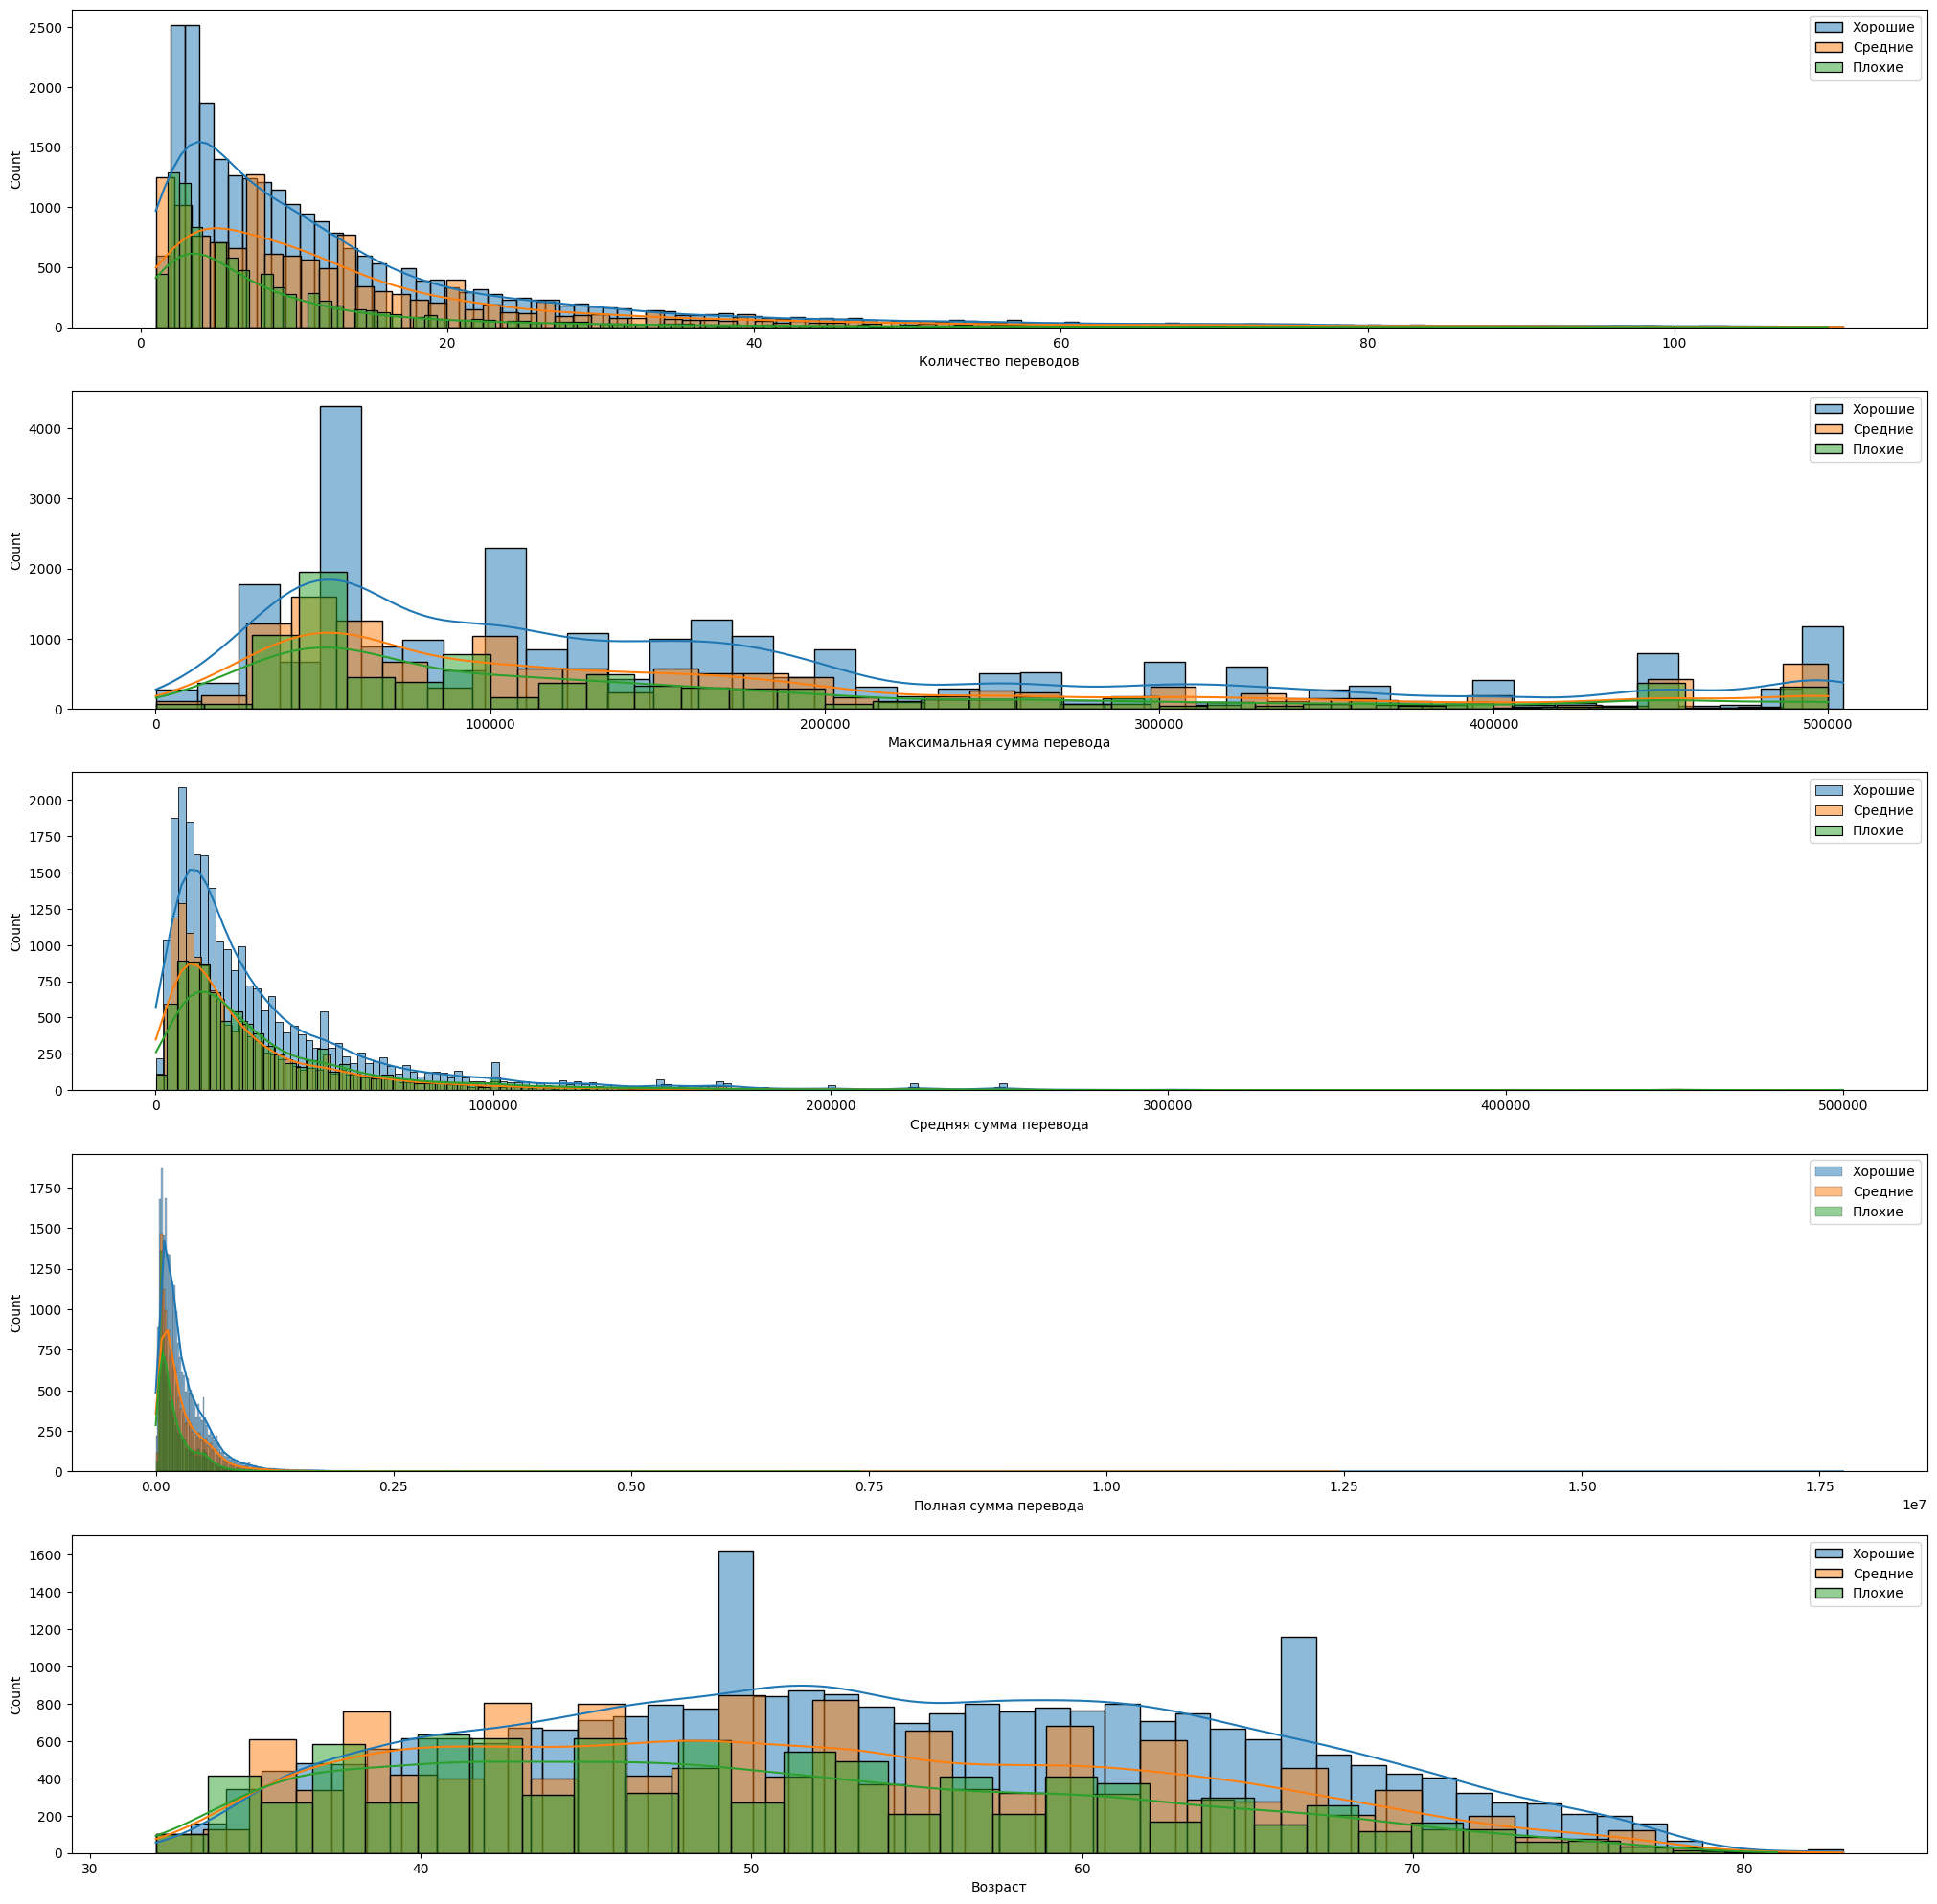

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(25,25))
i=0
for i, col in enumerate(cont_var):
    plt.subplot(5,1,i+1)
    ax = sns.histplot(df_others[df_others['Дисциплина клиентов без просрочки по кредиту'] == 'GOOD'][col], kde = True, label = 'Хорошие')
    ax = sns.histplot(df_others[df_others['Дисциплина клиентов без просрочки по кредиту'] == 'MIDDLE'][col], kde = True, label = 'Средние')
    ax = sns.histplot(df_others[df_others['Дисциплина клиентов без просрочки по кредиту'] == 'BAD'][col],  kde = True, label = 'Плохие')
    #plt.title("Гистограмма и плотность \n для признака <<{}>>".format(dict_to_rus[col]))
    plt.xlabel(col)
    #plt.ylabel('Плотность')
    plt.legend()

In [ ]:
df_per = df.groupby(['Дисциплина клиентов без просрочки по кредиту', 'Возраст']).size().reset_index()
df_per['percentage'] = df.groupby(['Дисциплина клиентов без просрочки по кредиту', 'Возраст']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_per.columns = ['Дисциплина клиентов без просрочки по кредиту', 'Возраст', 'Counts', 'Percentage']

px.bar(df_per, x='Возраст', y=['Counts'], color='Дисциплина клиентов без просрочки по кредиту', text=df_per['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

<ipython-input-50-56674068ffaa>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_per['percentage'] = df.groupby(['Дисциплина клиентов без просрочки по кредиту', 'Возраст']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values


In [ ]:
df_per1 = df.groupby(['Дисциплина клиентов без просрочки по кредиту', 'Канал, через который пришел клиент']).size().reset_index()
df_per1['percentage'] = df.groupby(['Дисциплина клиентов без просрочки по кредиту', 'Канал, через который пришел клиент']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_per1.columns = ['Дисциплина клиентов без просрочки по кредиту', 'Канал, через который пришел клиент', 'Counts', 'Percentage']

px.bar(df_per1, x='Канал, через который пришел клиент', y=['Counts'], color='Дисциплина клиентов без просрочки по кредиту', text=df_per1['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

<ipython-input-51-5fe72fb1cf5c>:2: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [ ]:
df.columns

Index(['Идентификатор', 'Дата рождения',
       'Дисциплина клиентов без просрочки по кредиту', 'Количество переводов',
       'Тип переводов', 'География переводов', 'География телефона',
       'Максимальная сумма перевода', 'Средняя сумма перевода',
       'Полная сумма перевода', 'Канал, через который пришел клиент',
       'Оператор связи', 'Пол', 'Возраст'],
      dtype='object')

In [ ]:
df_max1 = df[(df['Дисциплина клиентов без просрочки по кредиту'] == 'BAD')]
df_max2 = df[df['Дисциплина клиентов без просрочки по кредиту'] == 'GOOD']
df_max1
df_max2

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол,Возраст
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,135000.0,43184.0280,215920.14,Стойка,NaN,М,45
53,4115047,1978-12-07,GOOD,17.0,2.0,77.0,77.0,135000.0,15291.2929,259951.98,Офис,NaN,Ж,45
87,4515611,1987-09-14,GOOD,7.0,2.0,61.0,61.0,20000.0,3574.2857,25020.00,Партнер,NaN,М,36
178,5448228,1976-04-16,GOOD,6.0,2.0,77.0,77.0,265000.0,44266.6666,265600.00,Офис,NaN,Ж,47
180,14426582,1988-06-07,GOOD,11.0,5.0,59.0,59.0,55000.0,7345.4545,80800.00,Партнер,NaN,М,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50154,21585124,1970-06-30,GOOD,746.0,0.0,77.0,77.0,250000.0,13454.0884,10036750.00,Офис,Вымпел-Коммуникации,М,53
50157,13095859,1959-04-28,GOOD,813.0,32.0,40.0,72.0,256974.0,15830.7042,12870362.54,Партнер,Мобильные ТелеСистемы,Ж,64
50167,1542147,1989-03-15,GOOD,NaN,69.0,77.0,NaN,NaN,NaN,NaN,Офис,МегаФон,М,34
50202,4183283,1971-07-24,GOOD,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Стойка,Вымпел-Коммуникации,М,52


$H_0$ - нет статистически значимой разницы по признаку "Максимальная сумма перевода" между клиентами с дисциплиной 'BAD' и 'GOOD';

$H_1$ - "Максимальная сумма" по целевому признаку "Дисциплина клиентов без просрочки по кредиту" отличны от друг друга

In [ ]:
stats.mannwhitneyu(df_max1['Максимальная сумма перевода'].dropna(),
                   df_max2['Максимальная сумма перевода'].dropna(), alternative='two-sided')
# h0 отвергаем

MannwhitneyuResult(statistic=109957965.5, pvalue=5.560954934317604e-54)

$H_0$ - Клиенты с категорией "BAD" превосходят клиентов "GOOD" по количеству переводов;

$H_1$ - Клиенты с категорией "GOOD" превосходят клиентов "BAD" по количеству переводов;

In [69]:
stats.mannwhitneyu(df_max1['Максимальная сумма перевода'].dropna(),
                   df_max2['Максимальная сумма перевода'].dropna(), alternative='greater')
# h0 отвергаем

MannwhitneyuResult(statistic=109957965.5, pvalue=1.0)

$H_0$ нет статистически значимой разницы по возрасту между клиентами с дисциплиной 'BAD' и 'GOOD';

$H_1$ - Между клиентами банка присутствует статистически значимая разница по категории "Возраст";

In [78]:
stats.mannwhitneyu(df_max1['Возраст'].dropna(),
                   df_max2['Возраст'].dropna(), alternative='less')
# h0 отвергаем

MannwhitneyuResult(statistic=98001495.5, pvalue=3.573038140418489e-193)

$BAD$

- Среднее количество переводов: 9.48
- Частый тип перевода: 2
- Частая география переводов и звонков: 77
- Средний размер суммы перевода: 195148.96
- Средний размер максимальной суммы перевода: 145532.26
- Клиенты данной категории зачастую приходят с каналов типа: "Стойка" и "Партнер"
- В разрезе значения "пол" распределение одинаковое.
-средний возраст: 47 лет

$MIDDLE$

- Среднее количество переводов: 14.30
- Частый тип перевода: 2
- Частая география переводов и звонков: 77
- Средний размер суммы перевода: 234201
- Средний размер максимальной суммы перевода: 153086.20
- Клиенты данной категории зачастую приходят с каналов типа: "Офис"
- В разрезе значения "пол" распределение одинаковое.
-средний возраст: 50 лет

$GOOD$

- Среднее количество переводов: 13.41
- Частый тип перевода: 2
- Частая география переводов и звонков: 77
- Средний размер суммы перевода: 240226.23
- Средний размер максимальной суммы перевода: 160097.77
- Клиенты данной категории зачастую приходят с каналов типа: "Офис"
- В разрезе значения "пол" распределение одинаковое.
-средний возраст: 53 лет
